In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotnine
import scipy.stats
import seaborn as sns
import sklearn.metrics

%matplotlib inline

In [3]:
features_dict = np.load('../data/edge_predict/pruned_features.npz')
df = pd.DataFrame.from_dict(dict(features_dict))

In [4]:
df.head()

,original,pruned_edge,rwr,p_rwr,edge_prior
0,1.0,0.0,0.323468,0.251352,0.000
1,0.0,0.0,0.000084,0.000610,0.029
2,0.0,0.0,0.001625,0.000750,0.036
3,0.0,0.0,0.000085,0.000361,0.014
4,0.0,0.0,0.000098,0.000212,0.009


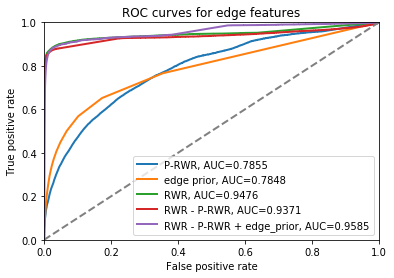

In [12]:
fpr, tpr, thresh = sklearn.metrics.roc_curve(df['original'], df['p_rwr'])
auc = sklearn.metrics.roc_auc_score(df['original'], df['p_rwr'])
plt.plot(fpr, tpr, label=f"P-RWR, AUC={auc :.4f}", lw=2)

fpr, tpr, thresh = sklearn.metrics.roc_curve(df['original'], df['edge_prior'])
auc = sklearn.metrics.roc_auc_score(df['original'], df['edge_prior'])
plt.plot(fpr, tpr, label=f"edge prior, AUC={auc :.4f}", lw=2)

fpr, tpr, thresh = sklearn.metrics.roc_curve(df['original'], df['rwr'])
auc = sklearn.metrics.roc_auc_score(df['original'], df['rwr'])
plt.plot(fpr, tpr, label=f"RWR, AUC={auc :.4f}", lw=2)

fpr, tpr, thresh = sklearn.metrics.roc_curve(df['original'], (df['rwr'] - df['p_rwr']))
auc = sklearn.metrics.roc_auc_score(df['original'], (df['rwr'] - df['p_rwr']))
plt.plot(fpr, tpr, label=f"RWR - P-RWR, AUC={auc :.4f}", lw=2)

fpr, tpr, thresh = sklearn.metrics.roc_curve(df['original'], (df['rwr'] - df['p_rwr'] + df['edge_prior']))
auc = sklearn.metrics.roc_auc_score(df['original'], (df['rwr'] - df['p_rwr'] + df['edge_prior']))
plt.plot(fpr, tpr, label=f"RWR - P-RWR + edge_prior, AUC={auc :.4f}", lw=2)

plt.plot([0,1], [0,1], linestyle='--', color='grey', lw=2)

plt.legend(loc=0)
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curves for edge features')
plt.savefig('../img/feature_roc.svg', bbox_inches='tight', pad_inches=0)
plt.savefig('../img/feature_roc.png', bbox_inches='tight', pad_inches=0, dpi=600)

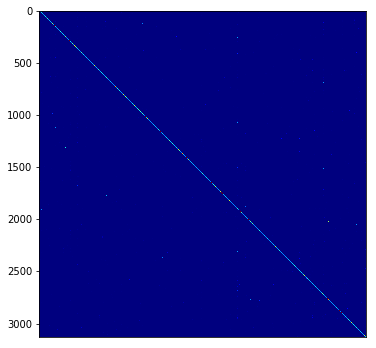

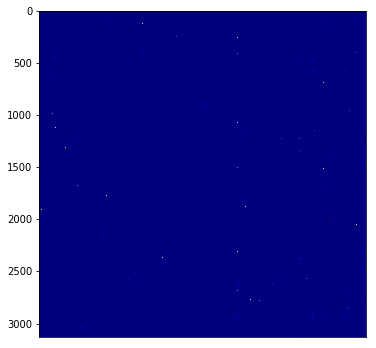

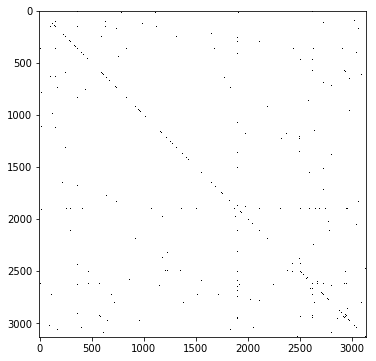

In [118]:
# Plot RWR matrix
rwr = df['rwr'].values.copy().reshape((3133, 3133))
rwr -= rwr.mean()
rwr /= rwr.std()

plt.figure(figsize=(6, 6))
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
plt.imshow(rwr, cmap='jet')

# Remove diagonal
rwr_no_diag = df['rwr'].values.copy().reshape((3133, 3133))
rwr_no_diag -= rwr_no_diag.mean()
rwr_no_diag /= rwr_no_diag.std()
rwr_no_diag -= np.diag(rwr_no_diag.diagonal())

plt.figure(figsize=(6, 6))
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
plt.imshow(rwr_no_diag, cmap='jet')

# Plot original adjacency matrix
original = df['original'].values.reshape((3133, 3133))

plt.figure(figsize=(6, 6))
plt.imshow(original, cmap='Greys')

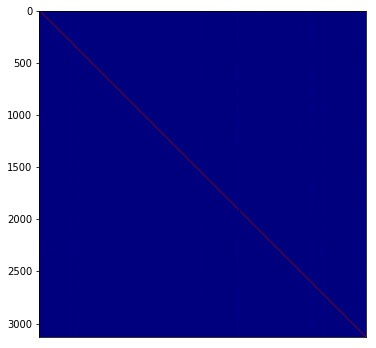

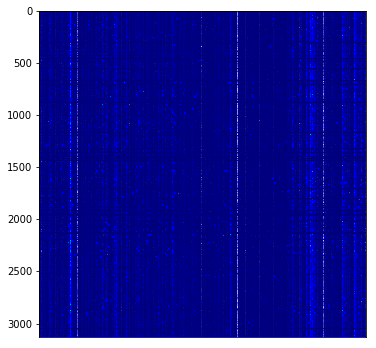

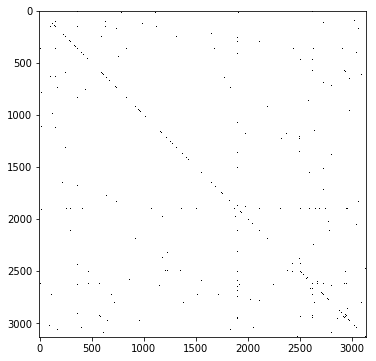

In [119]:
# Plot permuted RWR matrix
p_rwr = df['p_rwr'].values.copy().reshape((3133, 3133))
p_rwr -= p_rwr.mean()
p_rwr /= p_rwr.std()

plt.figure(figsize=(6, 6))
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
plt.imshow(p_rwr, cmap='jet')

# Remove diagonal
p_rwr_no_diag = df['p_rwr'].values.copy().reshape((3133, 3133))
p_rwr_no_diag -= p_rwr_no_diag.mean()
p_rwr_no_diag /= p_rwr_no_diag.std()
p_rwr_no_diag -= np.diag(p_rwr_no_diag.diagonal())

plt.figure(figsize=(6, 6))
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
plt.imshow(p_rwr_no_diag, cmap='jet')

# Plot original adjacency matrix
original = df['original'].values.reshape((3133, 3133))

plt.figure(figsize=(6, 6))
plt.imshow(original, cmap='Greys')

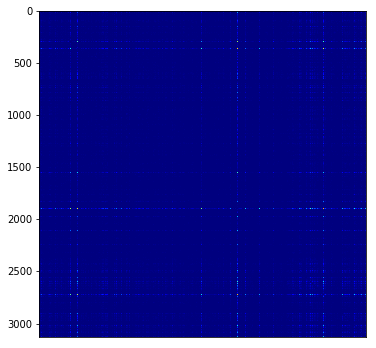

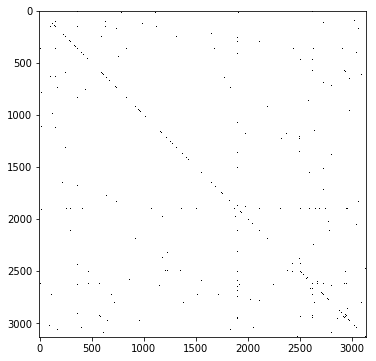

In [120]:
# Plot edge_prior matrix
prior = df['edge_prior'].values.copy().reshape((3133, 3133))
prior -= prior.mean()
prior /= prior.std()

plt.figure(figsize=(6, 6))
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
plt.imshow(prior, cmap='jet')

# Plot original adjacency matrix
original = df['original'].values.reshape((3133, 3133))

plt.figure(figsize=(6, 6))
plt.imshow(original, cmap='Greys')

In [132]:
col_id, row_id = np.meshgrid(range(3133), range(3133))
df['col'] = col_id.flatten()
df['row'] = row_id.flatten()
df['log_rwr'] = np.log(df['rwr'])
df['log_p_rwr'] = np.log(df['p_rwr'])
df['log_edge_prior'] = np.log(df['edge_prior'])

no_diag_df = df.query("row != col").replace([np.inf, -np.inf], np.nan).dropna(axis=0)

/home/zietzm/miniconda3/envs/xswap-analysis/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log
/home/zietzm/miniconda3/envs/xswap-analysis/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log
/home/zietzm/miniconda3/envs/xswap-analysis/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log


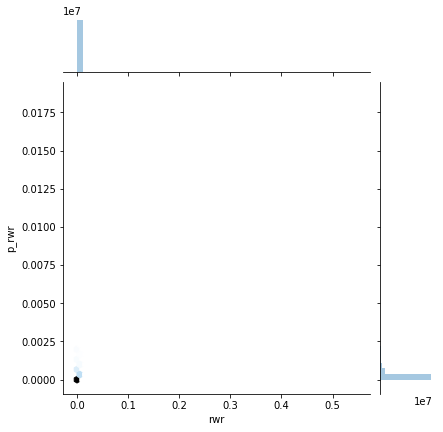

In [136]:
sns.jointplot(x='rwr', y='p_rwr', data=no_diag_df, kind='hex')

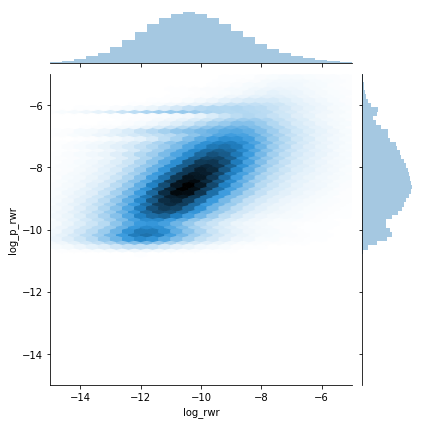

In [157]:
sns.jointplot(x='log_rwr', y='log_p_rwr', data=no_diag_df, kind='hex', xlim=[-15, -5], ylim=[-15, -5])

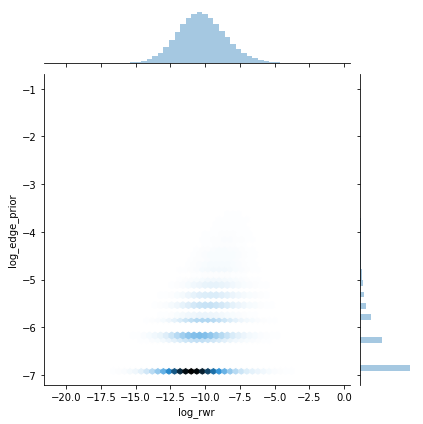

In [147]:
sns.jointplot(x='log_rwr', y='log_edge_prior', data=no_diag_df, kind='hex')

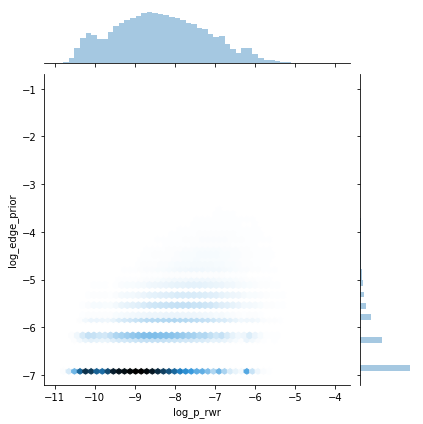

In [154]:
sns.jointplot(x='log_p_rwr', y='log_edge_prior', data=no_diag_df, kind='hex')

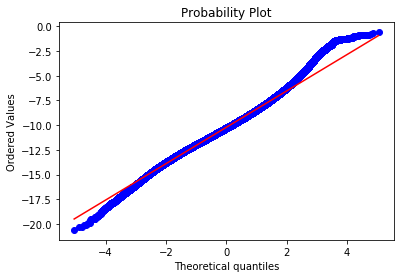

In [153]:
fig, ax = plt.subplots()
scipy.stats.probplot(no_diag_df['log_rwr'], plot=ax)

### Conclusions

* $\log(RWR)$ appears to follow a light-tailed normal distribution